**INITIALIZATION**

I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
# INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**DOWNLOADING LIBRARIES AND DEPENDENCIES:**

I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [2]:
# INSTALLING LIBRARIES AND DEPENDENCIES:
import math
import time
import numpy as np
import random
import torch
from d2l import torch as d2l

In [1]:
# FUNCTION TO COMPUTE NORMAL DISTRIBUTION:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

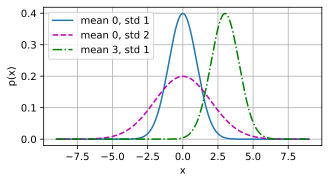

In [4]:
# VISUALIZING THE NORMAL DISTRIBUTION:
x = np.arange(-9, 9, 0.01)
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(
    x, [normal(x, mu, sigma) for mu, sigma in params],
    xlabel='x',
    ylabel='p(x)', figsize=(5, 2.5),
    legend=[f'mean {mu}, std {sigma}' for mu, sigma in params]
)

**SYNTHETIC REGRESSION DATA**

In [8]:
# DEFINING THE DATAMODULE:
class SyntheticRegressionData(d2l.DataModule):
    def __init__(
        self, w, b, noise=0.01, num_train=100, num_val=100, batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

In [9]:
# INSPECTING THE IMPLEMENTATION:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
print("features:", data.X[0], "\nlabel:", data.y[0])

features: tensor([ 0.3159, -1.4320]) 
label: tensor([9.6983])


In [12]:
# ADDING DATALOADER TO THE CLASS:
@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    if train:
        indices = list(range(0, self.num_train))
        random.shuffle(indices)
    else:
        indices = list(range(self.num_train, self.num_train+self.num_val))
    for i in range(0, len(indices), self.batch_size):
        batch_indices = torch.tensor(indices[i: i+self.batch_size])
        yield self.X[batch_indices], self.y[batch_indices]


# INSPECTING THE IMPLEMENTATION:
X, y = next(iter(data.train_dataloader()))
print("X shape:", X.shape, "\ny shape:", y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


In [13]:
# CONCISE IMPLEMENTATION OF THE DATALOADER:
@d2l.add_to_class(d2l.DataModule)
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    dataset = torch.utils.data.TensorDataset(*tensors)
    return torch.utils.data.DataLoader(dataset,self.batch_size, shuffle=train)

@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

# INSPECTING THE IMPLEMENTATION:
X, y = next(iter(data.train_dataloader()))
print("X shape:", X.shape, "\ny shape:", y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])
